# Домашняя работа «Оценка точности модели, переобучение, регуляризация» обновленное

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

### Загрузка данных:

In [2]:
data = pd.read_csv('D:/Downloads/ноутбук_и_дополнительнае_материалы-_Оценка_точности_модели__переобучение__регуляризация/athletes.csv')
print(data.isnull().sum())



id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64


## Преобразование данных

In [3]:
data.dropna(inplace=True)

In [4]:
#categorical_cols = data.select_dtypes(include=['object']).columns

In [5]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
y = data['sex']


## Разделение данных на обучающую и тестовую выборки


In [6]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [7]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [8]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [9]:
le.fit( data['sex'] )

LabelEncoder()

In [10]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели логистической регрессии

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Построение ROC-кривой и вычисление ROC-AUC

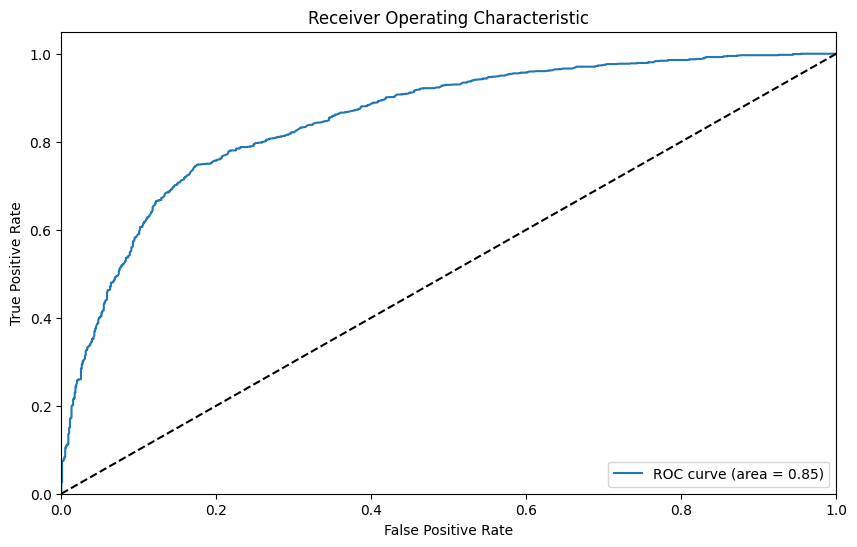

In [14]:
y_scores = model.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
# Построение ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Подсчет TPR и FPR вручную

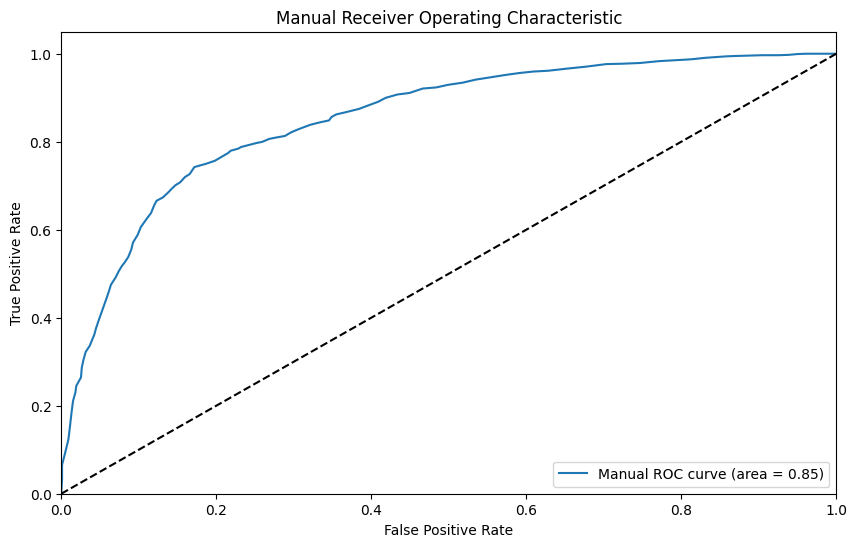

In [27]:
# Подсчет TPR и FPR вручную
thresholds_manual = np.arange(0, 1.01, 0.01)
tpr_manual = []
fpr_manual = []
for threshold in thresholds_manual:
    y_pred = (y_scores >= threshold).astype(int)
    tp = np.sum((y_pred == 1) & (y_test == 1))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    
    tpr_manual.append(tp / (tp + fn))  # True Positive Rate
    fpr_manual.append(fp / (fp + tn))  # False Positive Rate

# Ручной ROC AUC
roc_auc_manual = abs(np.trapezoid(tpr_manual, fpr_manual))

# Построение ROC-кривой вручную
plt.figure(figsize=(10, 6))
plt.plot(fpr_manual, tpr_manual, label='Manual ROC curve (area = {:.2f})'.format(roc_auc_manual))
plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Manual Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Построение графика Precision-Recall

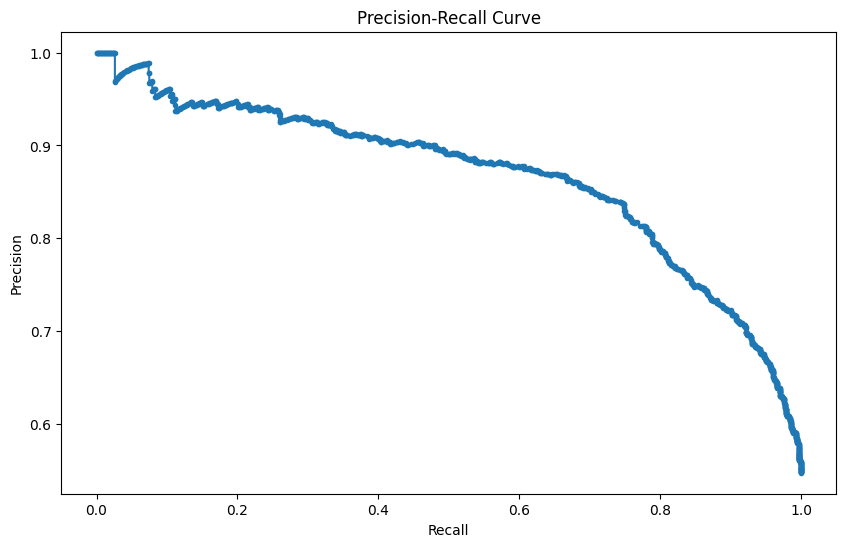

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## Вывод

a)Высокая точность (Precision) и полнота (Recall) свидетельствуют о том, что модель хорошо распознает положительные классы.
Если значение Precision остается высоким при увеличении Recall, это указывает на баланс между точностью и полнотой.
ROC AUC: значение 0.85 указывает на то, что модель имеет хорошую способность различать между положительными и отрицательными классами.
Ручной расчет дает то же самое значение, таким образом проверка успешна.

Precision (точность): Изображение показывает высокие значения точности (свыше 90%) при низких значениях recall (полнота), а затем точность начинает снижаться.
Recall (полнота): Значения recall растут, что показывает, что модель находит все больше положительных примеров. Однако при этом точность начинает снижаться.

b)
ROC-кривая (Receiver Operating Characteristic curve) должна находиться выше диагонали случайного выбора.
Если ROC-кривая находится ниже диагонали, это означает, что модель хуже, чем случайное предположение. Это указывает на то, что модель неэффективна для данного задачи.
